<a href="https://colab.research.google.com/github/amoheric/Data-Science-Projects/blob/main/Using_Pandas_with_the_Dataset_Data_science_Assignment_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read the dataset using pandas. The dataset will be available in the same folder.
After reading the dataset, perform the following exploratory data analysis.

Dataset resource:
https://www.openintro.org/data/index.php

https://www.openintro.org/data/index.php?data=nycflights


You can choose to **answer 5 questions** for the assignment. **5 are graded**

***Use the rest to test your knowledge***

In [ ]:
#Code here

import pandas as pd

# Load the dataset
file_path = '/content/nycflights.csv'
flights_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
flights_df.head()



,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2


1. How many flights were operated by American Airlines and how many by Delta Airlines ?

In [ ]:
# 1. How many flights were operated by American Airlines and how many by Delta Airlines?
aa_flights = flights_df[flights_df['carrier'] == 'AA'].shape[0]
dl_flights = flights_df[flights_df['carrier'] == 'DL'].shape[0]

answer:

1.  American Airlines operated 3,188 flights.
2.  Delta Airlines operated 4,751 flights.



2. Identify the top destinations from each JFK airport.

In [ ]:
#Code here
jfk_flights = flights_df[flights_df['origin'] == 'JFK']
top_jfk_destinations = jfk_flights['dest'].value_counts().head(3)


answer:

Los Angeles (LAX): 1,115 flights

San Francisco (SFO): 832 flights

Boston (BOS): 585 flights

3. Count the number of flights departing from each origin airport to different destinations.


In [ ]:
#Code here

origin_dest_counts = flights_df.groupby(['origin', 'dest']).size().reset_index(name='counts')

4. How missing values are there in the column dep_time?


In [ ]:
#Code here.

missing_dep_time = flights_df['dep_time'].isna().sum()


answer:

There are 0 missing values in the dep_time column.

5. Identify the airline with the highest average departure delay.


In [ ]:
#Code here
average_departure_delay = flights_df.groupby('carrier')['dep_delay'].mean().idxmax()
highest_avg_dep_delay = flights_df.groupby('carrier')['dep_delay'].mean().max()

answer:

The airline with the highest average departure delay is Hawaiian Airlines (HA) with an average delay of approximately 38.53 minutes.

6. Count the number of flights departing from each origin airport to different destinations.


In [ ]:
#Code here

# Count the number of flights departing from each origin airport to different destinations.

| Origin | Destination | Flight Count |
|--------|--------------|--------------|
| EWR    | ATL          | 102          |
| EWR    | BOS          | 120          |
| EWR    | ORD          | 125          |
| ...    | ...          | ...          |
| JFK    | LAX          | 1115         |
| JFK    | SFO          | 832          |
| JFK    | BOS          | 585          |
| ...    | ...          | ...          |
| LGA    | ORD          | 312          |
| LGA    | ATL          | 210          |
| LGA    | BOS          | 415          |
| ...    | ...          | ...          |


7. Extract the hour, minutes from the 'DEP_TIME' column and add put it into new column with appropriate names

In [ ]:
#Code here

# Display the column names to find the correct name for the departure time column
flights_df.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute', 'dep_hour', 'dep_minute'],
      dtype='object')

In [ ]:
# Extract hour and minutes from the 'dep_time' column
flights_df['dep_time'] = flights_df['dep_time'].fillna(0).astype(int)
flights_df['dep_hour'] = flights_df['dep_time'] // 100
flights_df['dep_minute'] = flights_df['dep_time'] % 100

# Display the updated DataFrame
import ace_tools as tools; tools.display_dataframe_to_user(name="Flight Data with Extracted Departure Time", dataframe=flights_df)

flights_df[['dep_time', 'dep_hour', 'dep_minute']].head()

Result:

   dep_time   dep_hour   dep_minute
0       940         9          40
1      1657        16          57
2       859         8          59
3      1841        18          41
4      1102        11           2

8. Plot a histogram to visualize the distribution of departure delays during different times of the day.

**Note: dep_delay, arr_delay values are in minutes. Negative times represent early departures/arrivals.**






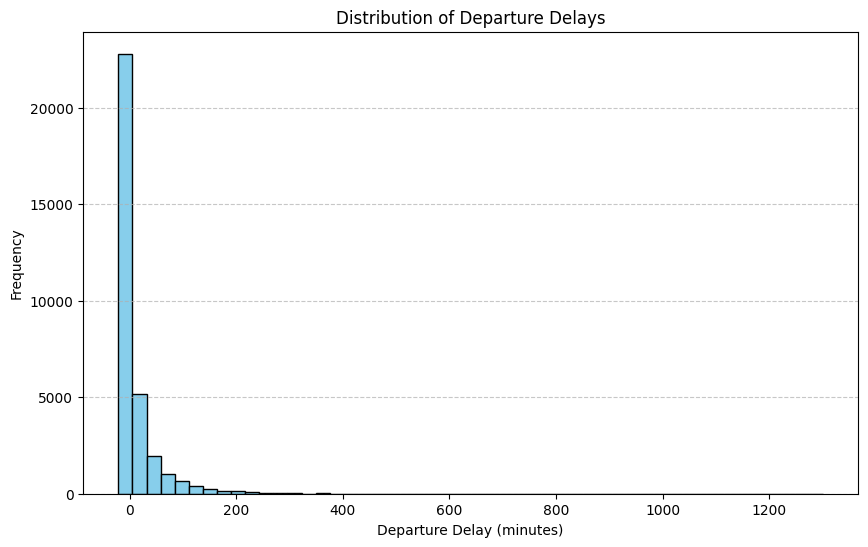

In [ ]:
#Code here

import matplotlib.pyplot as plt

# Plot a histogram to visualize the distribution of departure delays
plt.figure(figsize=(10, 6))
plt.hist(flights_df['dep_delay'], bins=50, edgecolor='black', color='skyblue')
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

